In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm 

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import NMF

pd.set_option('display.max_columns', None, 'display.max_rows', None)

In [76]:
df = pd.read_csv('../data/survey_scaled.csv')

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2826 entries, 0 to 2825
Columns: 171 entries, moa1#1_1 to demo_us
dtypes: float64(171)
memory usage: 3.7 MB


In [78]:
df.head()

,moa1#1_1,moa1#1_2,moa1#1_3,moa1#1_4,moa1#1_5,moa1#1_6,moa1#1_7,moa1#1_8,moa1#1_9,moa1#1_10,moa1#2_1,moa1#2_2,moa1#2_3,moa1#2_4,moa1#2_5,moa1#2_6,moa1#2_7,moa1#2_8,moa1#2_9,moa1#2_10,moa2#1_1,moa2#1_2,moa2#1_3,moa2#1_4,moa2#1_5,moa2#1_6,moa2#1_7,moa2#1_8,moa2#1_9,moa2#1_10,moa2#2_1,moa2#2_2,moa2#2_3,moa2#2_4,moa2#2_5,moa2#2_6,moa2#2_7,moa2#2_8,moa2#2_9,moa2#2_10,moa_adult,idea_1,idea_2,idea_3,idea_4,idea_5,idea_6,idea_7,idea_8,swb_1,swb_2,swb_3,swb_4,swb_5,swb_6,mindful_1,mindful_2,mindful_3,mindful_4,mindful_5,mindful_6,mindful_7,mindful_8,mindful_9,mindful_10,mindful_11,mindful_12,mindful_13,mindful_14,mindful_15,belong_1,belong_2,belong_3,belong_4,belong_5,belong_6,belong_7,belong_8,belong_9,belong_10,belong_now,efficacy_1,efficacy_2,efficacy_3,efficacy_4,efficacy_5,efficacy_6,efficacy_7,efficacy_8,efficacy_9,efficacy_10,support_1,support_2,support_3,support_4,support_5,support_6,support_7,support_8,support_9,support_10,support_11,support_12,socmedia_1,socmedia_2,socmedia_3,socmedia_4,socmedia_5,socmedia_6,socmedia_7,socmedia_8,socmedia_9,socmedia_10,socmedia_11,usdream_1,usdream_2,transgres_freq,transgres_common,transgres_1,transgres_2,transgres_3,transgres_4,exploit_1,exploit_2,exploit_3,disability11,disability14_1,disability14_2,disability14_3,disability14_4,disability14_5,disability10_1,disability10_2,disability10_3,disability10_4,disability10_5,disability10_6,disability10_7,disability10_8,disability10_9,disability10_10,disability10_11,disability10_12,disability10_13,disability10_14,disability10_15,physsx_1,physsx_2,physsx_3,physsx_4,physsx_5,physsx_6,physsx_7,physsx_8,physsx_9,physsx_10,physsx_11,physsx_12,physsx_13,stress_1,stress_2,stress_3,stress_4,stress_5,stress_6,stress_7,stress_8,stress_9,stress_10,demo_mil,demo_us
0,7.0,7.0,5.0,3.0,3.0,5.0,3.0,1.0,7.0,5.0,4.0,1.0,4.0,1.0,1.0,1.0,4.0,7.0,7.0,4.0,7.0,7.0,7.0,7.0,5.0,7.0,7.0,7.0,5.0,3.0,4.0,1.0,1.0,7.0,4.0,7.0,7.0,4.0,4.0,1.0,7.0,5.0,7.0,7.0,5.0,7.0,7.0,7.0,7.0,4.0,6.0,5.0,5.0,3.0,3.0,4.6,2.2,2.2,2.2,4.6,1.0,2.2,2.2,2.2,2.2,2.2,4.6,1.0,2.2,4.6,5.5,2.5,5.5,5.5,5.5,2.5,7.0,2.5,5.5,4.0,5.5,7.0,5.0,7.0,5.0,5.0,7.0,5.0,5.0,7.0,5.0,7.0,4.0,6.0,5.0,6.0,6.0,7.0,7.0,7.0,4.0,6.0,7.0,5.5,2.5,7.0,4.0,7.0,7.0,7.0,5.5,7.0,7.0,5.5,5.5,5.5,3.0,3.0,3.0,1.0,1.0,1.0,2.0,2.0,2.0,7.0,7.0,7.0,7.0,7.0,7.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,7.0,1.0,1.0,4.0,1.0,4.0,1.0,4.0,4.0,4.0,4.0,7.0,4.0,2.5,5.5,7.0,4.0,4.0,4.0,5.5,4.0,4.0,4.0,1.0,1.0
1,7.0,7.0,7.0,3.0,5.0,5.0,7.0,5.0,5.0,5.0,1.0,1.0,4.0,4.0,1.0,1.0,1.0,1.0,4.0,7.0,5.0,7.0,3.0,7.0,7.0,5.0,3.0,7.0,3.0,1.0,7.0,1.0,4.0,4.0,1.0,4.0,4.0,4.0,4.0,1.0,7.0,7.0,7.0,7.0,7.0,5.0,7.0,7.0,7.0,3.0,4.0,5.0,5.0,4.0,4.0,2.2,2.2,2.2,1.0,3.4,1.0,1.0,1.0,2.2,2.2,1.0,2.2,1.0,1.0,5.8,2.5,4.0,1.0,7.0,5.5,5.5,2.5,5.5,7.0,5.5,5.5,5.0,5.0,5.0,7.0,7.0,7.0,5.0,5.0,5.0,7.0,7.0,7.0,7.0,6.0,7.0,6.0,6.0,7.0,7.0,7.0,7.0,7.0,4.0,2.5,5.5,2.5,1.0,1.0,1.0,1.0,2.5,5.5,2.5,5.5,5.5,4.0,4.0,4.0,3.0,2.0,1.0,4.0,4.0,3.0,7.0,7.0,7.0,7.0,7.0,7.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,4.0,1.0,1.0,7.0,1.0,1.0,7.0,4.0,1.0,1.0,7.0,7.0,5.5,7.0,7.0,5.5,4.0,4.0,2.5,2.5,5.5,5.5,1.0,1.0
2,7.0,7.0,7.0,1.0,1.0,7.0,3.0,5.0,7.0,5.0,4.0,1.0,1.0,1.0,1.0,1.0,4.0,7.0,7.0,7.0,7.0,3.0,3.0,7.0,5.0,5.0,7.0,7.0,5.0,3.0,4.0,1.0,1.0,4.0,1.0,4.0,7.0,1.0,1.0,1.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,5.0,5.0,1.0,2.0,2.0,2.0,2.0,2.0,2.2,3.4,1.0,2.2,3.4,1.0,2.2,2.2,5.8,3.4,2.2,1.0,1.0,1.0,4.6,5.5,5.5,2.5,7.0,5.5,5.5,2.5,4.0,5.5,5.5,2.5,5.0,5.0,1.0,3.0,3.0,5.0,1.0,5.0,3.0,3.0,6.0,6.0,5.0,2.0,7.0,5.0,5.0,3.0,6.0,6.0,5.0,6.0,4.0,4.0,5.5,2.5,4.0,5.5,5.5,2.5,4.0,4.0,4.0,2.5,2.5,6.0,5.0,3.0,1.0,4.0,1.0,5.0,5.0,3.0,7.0,7.0,7.0,7.0,4.0,7.0,5.8,4.6,5.8,3.4,5.8,7.0,4.6,2.2,5.8,2.2,4.6,2.2,5.8,3.4,3.4,7.0,1.0,1.0,7.0,4.0,4.0,1.0,7.0,4.0,1.0,4.0,7.0,7.0,5.5,5.5,7.0,2.5,1.0,7.0,2.5,2.5,5.5,5.5,1.0,1.0
3,7.0,5.0,5.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,7.0,4.0,7.0,7.0,3.0,3.0,7.0,5.0,3.0,7.0,3.0,5.0,3.0,4.0,1.0,1.0,4.0,1.0,4.0,4.0,4.0,4.0,1.0,7.0,7.0,7.0,5.0,5.0,

In [95]:
# This will be used when grabbing verbose descriptions of columns
# In other words, the text of the questions
label_df = pd.read_csv('../data/labels_lower.csv')
label_df.tail()

,Unnamed: 0,Variable Name,Question text,Survey Question ID
323,323,q81_click count,Timing - Click Count,"{""ImportId"":""QID81_CLICK_COUNT""}"
324,324,comments,"Do you have any questions, comments, or concer...","{""ImportId"":""QID84_TEXT""}"
325,325,affiliation,affiliation,"{""ImportId"":""affiliation""}"
326,326,response_bias_sum,Sum of all Bias Dummy Variables,ADDED
327,327,school_coded,Cleaned Names of Schools Attended,ADDED


In [116]:
def get_question_text(colname, label_df=label_df):
    '''Get column description'''
    
    cond = label_df['Variable Name'] == colname
    idx = label_df.index[cond].tolist()[0]
    text = label_df.iloc[idx]['Question text']
    
    return text

In [18]:
X = StandardScaler().fit_transform(df)

In [9]:
# From https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a

def plot_sil(X, ks):
    for i, k in enumerate(ks):
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))

        # Run the Kmeans algorithm
        km = KMeans(n_clusters=k)
        labels = km.fit_predict(X)
        centroids = km.cluster_centers_

        # Get silhouette samples
        silhouette_vals = silhouette_samples(df, labels)

        # Silhouette plot
        y_ticks = []
        y_lower, y_upper = 0, 0
        for i, cluster in enumerate(np.unique(labels)):
            cluster_silhouette_vals = silhouette_vals[labels == cluster]
            cluster_silhouette_vals.sort()
            y_upper += len(cluster_silhouette_vals)
            ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
            ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
            y_lower += len(cluster_silhouette_vals)

        # Get the average silhouette score and plot it
        avg_score = np.mean(silhouette_vals)
        ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
        ax1.set_yticks([])
        ax1.set_xlim([-0.1, 1])
        ax1.set_xlabel('Silhouette coefficient values')
        ax1.set_ylabel('Cluster labels')
        ax1.set_title('Silhouette plot for the various clusters', y=1.02);

        # Scatter plot of data colored with labels
#         ax2.scatter(X_std[:, 0], X_std[:, 1], c=labels)
#         ax2.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='r', s=250)
#         ax2.set_xlim([-2, 2])
#         ax2.set_xlim([-2, 2])
#         ax2.set_xlabel('Eruption time in mins')
#         ax2.set_ylabel('Waiting time to next eruption')
#         ax2.set_title('Visualization of clustered data', y=1.02)
#         ax2.set_aspect('equal')
        plt.tight_layout()
        plt.suptitle(f'Silhouette analysis using k = {k}',
                     fontsize=16, fontweight='semibold', y=1.05);

In [19]:
km = KMeans(n_clusters=10, n_jobs=-1)

In [20]:
labels = km.fit_predict(X)

In [32]:
# ks = [5, 10, 15, 20, 25]

# plot_sil(X, ks)

In [24]:
def plot2(X, ks):
    for n_clusters in ks:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            cmap = cm.get_cmap("nipy_spectral")
            color = cmap(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhoutte score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
#         cmap = cm.get_cmap("nipy_spectral")
#         colors = cmap(cluster_labels.astype(float) / n_clusters)
#         ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
#                     c=colors)

#         # Labeling the clusters
#         centers = clusterer.cluster_centers_
#         # Draw white circles at cluster centers
#         ax2.scatter(centers[:, 0], centers[:, 1],
#                     marker='o', c="white", alpha=1, s=200)

#         for i, c in enumerate(centers):
#             ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

#         ax2.set_title("The visualization of the clustered data.")
#         ax2.set_xlabel("Feature space for the 1st feature")
#         ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

        plt.show()

In [31]:
# ks = [2,3,4,5]
# plot2(X[:,:10], ks)

In [61]:
def plot_avg_sil_score(X, ks, iterations, verbose=False, savepath=None):
    df = pd.DataFrame(columns=ks)

    for i in range(iterations):
        sil_scores = []
        for k in ks:
            km = KMeans(n_clusters=k, n_jobs=-1)
            labels = km.fit_predict(X)    
            silhouette_vals = silhouette_samples(X, labels)
            avg_score = np.mean(silhouette_vals)
            sil_scores.append(avg_score)
        df.loc[i] = sil_scores
        if verbose:
            print(f'Iteration {i} Complete')
            
    fig, ax = plt.subplots(figsize=(9,5))
    ax = df.mean().plot(ax=ax)
    ax.set_xlabel('Number of Clusters (k)')
    ax.set_ylabel('Average Silhouette Score')
    ax.set_title(f'Avg Silhouette Score over {iterations} iterations')
    if savepath:
        fig.savefig(savepath)
    return df

Iteration 0 Complete
Iteration 1 Complete
Iteration 2 Complete
Iteration 3 Complete
Iteration 4 Complete
Iteration 5 Complete
Iteration 6 Complete
Iteration 7 Complete
Iteration 8 Complete
Iteration 9 Complete


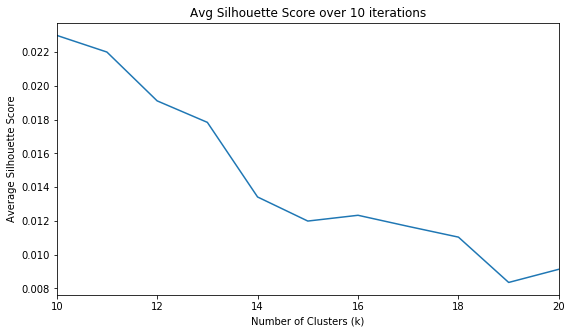

In [62]:
ks = range(10,21)

score_df = plot_avg_sil_score(X, ks, 10, verbose=True, 
                        savepath='../images/avg_sil_full_features.png')

In [128]:
def top_questions_from_topics(df, n_topics=5, n_ques=5): 
    
    # Fit NMF to X
    nmf = NMF(n_components=n_topics, random_state=1,
          alpha=.1, l1_ratio=.5).fit(df)

    # W matrix maps each row (person) from input matrix to topic vector -> shape(m, n_topics)
    W = nmf.transform(df)

    # For each row/person, grab the index column with highest value
    top_ques_per_person = W.argmax(1)

    # topics is the H matrix, mapping each topic to feature (question) -> shape (n_topics, p)
    topics = nmf.components_
    
    topic_questions = []
    
    for i, topic in enumerate(topics):
        topidxs = np.argsort(topic)[::-1][:n_ques]
        toplist = [(round(topic[i], 2), colname, get_question_text(colname)) 
                   for i, colname in zip(topidxs, df.columns[topidxs])]
        to_string = ['{} -> {} -> {}'.format(*tup) for tup in toplist]
        topques = '\n'.join(to_string)
        print(f'*****Topic: {i}*****\n**Top Questions:\n{topques}\n')
        topic_questions.append(toplist)
        
    return nmf, topic_questions

In [129]:
nmf, questions = top_questions_from_topics(df, n_topics=5, n_ques=5)

*****Topic: 0*****
**Top Questions:
5.68 -> support_3 -> My family really tries to help me.
5.57 -> support_9 -> I have friends with whom I can share my joys and sorrows.
5.56 -> support_11 -> My family is willing to help me make decisions.
5.54 -> disability11 -> Do you identify as a person with a disability?
5.53 -> swb_3 -> I am satisfied with my life.

*****Topic: 1*****
**Top Questions:
7.24 -> physsx_12 -> Feeling tired or having low energy
6.53 -> stress_3 -> ... felt nervous and "stressed"?
6.34 -> stress_2 -> ...felt that you were unable to control the important things in your life?
6.3 -> physsx_13 -> Trouble sleeping
6.03 -> stress_10 -> ... felt difficulties were piling up so high that you could not overcome them?

*****Topic: 2*****
**Top Questions:
8.15 -> disability10_2 -> I don't think of myself as a disabled person.
7.93 -> disability10_11 -> I can live a normal life with my disability.
7.28 -> disability10_9 -> Without my disability I could accomplish more.
7.18 -> di